In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define ticker and date range
ticker = "MSFT"
start_date = "2020-01-01"
end_date = "2024-01-01"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Reset index to make 'Date' a column
data.reset_index(inplace=True)

# Save to CSV
data.to_csv(f"{ticker}_data.csv", index=False)

print("Data saved to stock_data.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data saved to stock_data.csv


In [3]:
print(data.dtypes)

Price   Ticker
Date              datetime64[ns]
Close   MSFT             float64
High    MSFT             float64
Low     MSFT             float64
Open    MSFT             float64
Volume  MSFT               int64
dtype: object


In [4]:
data.head(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2020-01-02,153.323273,153.428276,151.137310,151.566865,22622100
1,2020-01-03,151.414108,152.683690,150.879551,151.127749,21116200
2,2020-01-06,151.805481,151.872308,149.399957,149.944070,20813700
3,2020-01-07,150.421387,152.416438,150.173203,152.082346,21634100
4,2020-01-08,152.817352,153.495104,150.774570,151.710046,27746500
5,2020-01-09,154.726486,154.850585,153.714643,154.487843,21385000
6,2020-01-10,154.010544,155.805143,153.857809,155.423320,20725900
7,2020-01-13,155.862427,155.891063,153.934188,154.411474,21626500
8,2020-01-14,154.764679,156.167900,154.373301,155.967434,23477400


In [5]:
data.tail(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
996,2023-12-15,367.241974,368.896245,362.833830,363.398474,78478200
997,2023-12-18,369.143829,369.490542,365.211181,365.973955,21802900
998,2023-12-19,369.748138,369.748138,366.360303,367.994772,20603700
999,2023-12-20,367.132935,372.492037,367.043785,371.471729,26316700
1000,2023-12-21,370.025513,370.887322,366.558443,369.054722,17708000
1001,2023-12-22,371.055695,371.650055,369.203294,370.164168,17091100
1002,2023-12-26,371.134979,373.393526,369.985890,371.471777,12673100
1003,2023-12-27,370.550507,371.531182,369.302352,370.174077,14905400
1004,2023-12-28,371.749115,372.918006,370.639658,371.838265,14327000


In [6]:
# Load the stock data from CSV
def load_data(ticker):
    df = pd.read_csv(f"{ticker}_data.csv")
    return df

# Clean the data (ensure numeric columns are of the correct type)
def clean_data(df):
    # Ensure 'Close' and 'Volume' are numeric, force errors to NaN, then drop those rows
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

    # Drop rows with any NaN values after conversion
    df = df.dropna(subset=['Close', 'Volume'])
    return df

# Calculate Moving Averages (MA)
def calculate_moving_averages(df):
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA100'] = df['Close'].rolling(window=100).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()
    return df

# Calculate Relative Strength Index (RSI)
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()  # Calculate daily returns
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()  # Positive gains
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()  # Negative losses
    rs = gain / loss  # Relative strength
    df['RSI'] = 100 - (100 / (1 + rs))  # RSI formula
    return df

# Normalize Volume (relative to the average volume over a specific period)
def normalize_volume(df, window=50):
    df['Norm_Volume'] = df['Volume'] / df['Volume'].rolling(window=window).mean()
    return df

# Calculate Bollinger Bands (Upper and Lower)
def calculate_bollinger_bands(df, window=20, num_std=2):
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * num_std)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * num_std)
    return df

In [7]:
def plot_bollinger_bands_and_rsi(df):
    
    # Bollinger Bands plot
    plt.figure(figsize=(14, 7))
    
    # Plot Close price, Upper and Lower Bollinger Bands
    plt.subplot(2, 1, 1)
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=1)
    plt.plot(df['Date'], df['Bollinger_Upper'], label='Bollinger Upper', color='red', linestyle='--', linewidth=1)
    plt.plot(df['Date'], df['Bollinger_Lower'], label='Bollinger Lower', color='red', linestyle='--', linewidth=1)
    plt.title('Bollinger Bands')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    
    # RSI plot
    plt.subplot(2, 1, 2)
    plt.plot(df['Date'], df['RSI'], label='RSI', color='blue', linewidth=1)
    plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
    plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
    plt.title('Relative Strength Index (RSI)')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    
    plt.tight_layout()
    plt.show()


In [8]:
# Main feature engineering function
def feature_engineering(ticker):
    # Load the raw stock data
    df = load_data(ticker)
    
    # Clean the data
    df = clean_data(df)
    
    # Calculate each of the features
    df = calculate_moving_averages(df)
    df = calculate_rsi(df)
    df = normalize_volume(df)
    df = calculate_bollinger_bands(df)
    
    # Drop rows with NaN values (especially for rolling calculations)
    df = df.dropna()
    
    # Save the new dataframe with additional features
    df.to_csv(f"{ticker}_stock_features.csv", index=False)
    print(f"Enhanced data saved to {ticker}_stock_features.csv")

    plot_bollinger_bands_and_rsi(df)

Enhanced data saved to MSFT_stock_features.csv


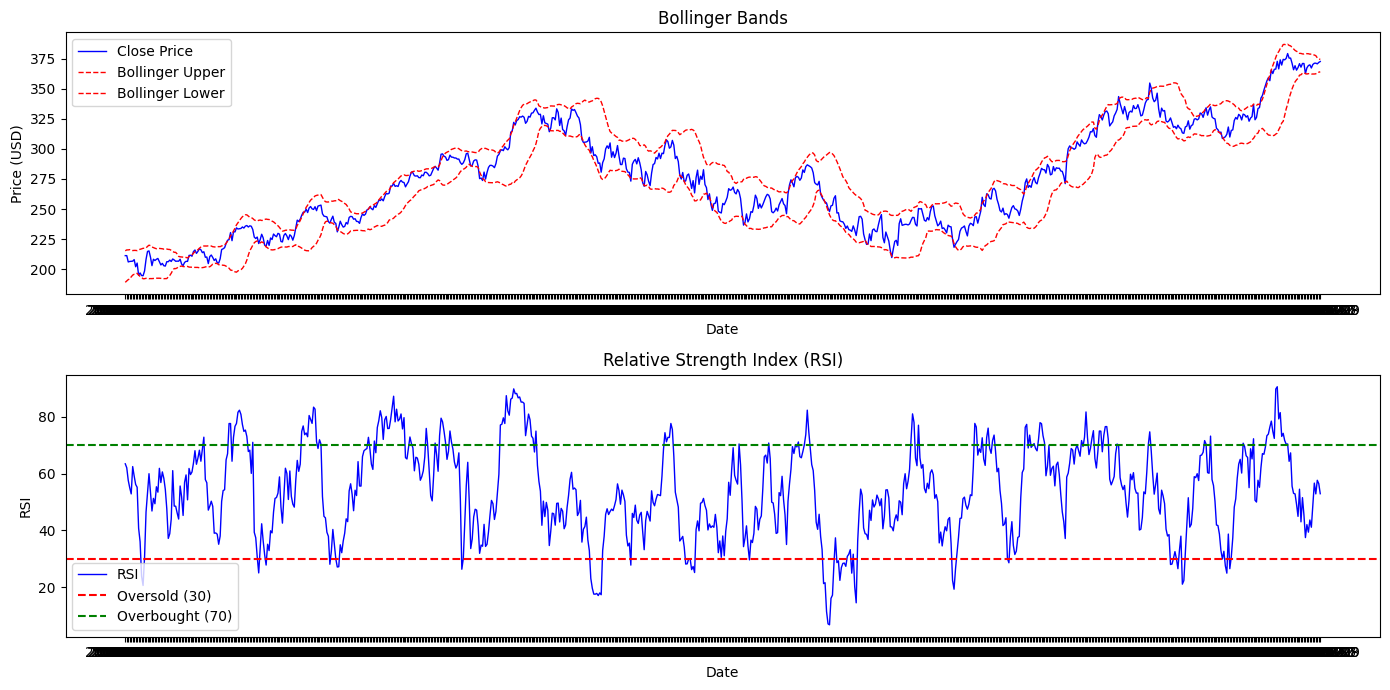

In [9]:
feature_engineering(ticker)

In [10]:
df = pd.read_csv(f"{ticker}_stock_features.csv")

In [11]:
df.head(10)

,Date,Close,High,Low,Open,Volume,MA10,MA50,MA100,MA200,RSI,Norm_Volume,Bollinger_Upper,Bollinger_Lower
0,2020-10-15,211.349091,212.022603,207.837181,208.885951,22733100.0,206.238097,203.882423,197.775834,179.449973,63.430009,0.709805,215.381607,189.200980
1,2020-10-16,211.349091,213.879574,211.021958,211.820542,26057900.0,207.534132,203.956157,198.144232,179.740102,62.034776,0.816984,216.105450,190.331226
2,2020-10-19,206.114944,213.889238,205.633862,212.080363,27625800.0,207.903603,203.999500,198.464223,180.013607,57.611503,0.866247,216.103639,191.456847
3,2020-10-20,206.528641,209.145730,205.027666,207.635139,22753500.0,208.744536,204.132321,198.770594,180.287222,55.013913,0.719772,216.343589,191.912542
4,2020-10-21,206.672989,208.712773,205.056544,205.056544,22724900.0,209.222731,204.361516,199.082440,180.568480,52.846639,0.725162,215.881798,193.741569
5,2020-10-22,206.759613,207.885344,203.690305,205.835928,22351500.0,209.637424,204.480910,199.375187,180.838192,62.457038,0.715833,215.561160,195.187942
6,2020-10-23,208.048904,208.097016,205.095066,206.894310,18879600.0,209.677834,204.635497,199.676508,181.104804,59.120624,0.606082,215.699060,195.859223
7,2020-10-26,202.131561,208.154707,200.226479,205.758926,37111600.0,208.588663,204.667898,199.942076,181.345409,56.177793,1.176902,215.677818,195.942044
8,2020-10-27,205.181595,206.547867,202.372076,203.584398,36700300.0,207.664015,204.734807,200.197064,181.592005,55.181737,1.151793,215.505965,196.690229
9,2020-10-28,195.011566,200.938505,194.453523,199.812774,51195600.0,205.914799,204.575088,200.339216,181.793239,40.775312,1.577151,216.260549,195.199595


In [12]:
df.tail(10)

,Date,Close,High,Low,Open,Volume,MA10,MA50,MA100,MA200,RSI,Norm_Volume,Bollinger_Upper,Bollinger_Lower
797,2023-12-15,367.241974,368.896245,362.833830,363.398474,78478200.0,367.742178,351.977513,336.662261,320.574626,42.050086,2.836525,379.023313,362.094549
798,2023-12-18,369.143829,369.490542,365.211181,365.973955,21802900.0,368.089871,352.889904,337.091159,321.163879,39.396410,0.790242,378.961546,362.433678
799,2023-12-19,369.748138,369.748138,366.360303,367.994772,20603700.0,368.163177,353.763765,337.450633,321.748377,43.669292,0.746391,378.624331,362.356824
800,2023-12-20,367.132935,372.492037,367.043785,371.471729,26316700.0,368.343463,354.613596,337.808124,322.333186,41.129861,0.949389,378.632824,362.105631
801,2023-12-21,370.025513,370.887322,366.558443,369.054722,17708000.0,368.600027,355.441599,338.190398,322.934673,48.928176,0.639913,378.210291,362.101220
802,2023-12-22,371.055695,371.650055,369.203294,370.164168,17091100.0,368.634698,356.315118,338.670180,323.548103,56.647082,0.618614,377.891392,362.137801
803,2023-12-26,371.134979,373.393526,369.985890,371.471777,12673100.0,368.967545,357.258039,339.159041,324.180287,52.844275,0.461510,377.356445,362.281467
804,2023-12-27,370.550507,371.531182,369.302352,370.174077,14905400.0,368.936838,358.092192,339.631009,324.783316,57.639886,0.545685,375.557993,363.225037
805,2023-12-28,371.749115,372.918006,370.639658,371.838265,14327000.0,369.026981,358.961785,340.091978,325.358525,56.453014,0.526055,374.849438,363.579948
806,2023-12-29,372.501984,373.611441,369.966072,372.462352,18723000.0,370.028467,359.884990,340.600527,325.914613,52.916566,0.689710,374.174370,363.970717


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             807 non-null    object 
 1   Close            807 non-null    float64
 2   High             807 non-null    float64
 3   Low              807 non-null    float64
 4   Open             807 non-null    float64
 5   Volume           807 non-null    float64
 6   MA10             807 non-null    float64
 7   MA50             807 non-null    float64
 8   MA100            807 non-null    float64
 9   MA200            807 non-null    float64
 10  RSI              807 non-null    float64
 11  Norm_Volume      807 non-null    float64
 12  Bollinger_Upper  807 non-null    float64
 13  Bollinger_Lower  807 non-null    float64
dtypes: float64(13), object(1)
memory usage: 88.4+ KB
